**Libraries**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import os
os.listdir('/content/drive/MyDrive/House_EDA_Project')

['Copy of House_EDA.ipynb', 'Copy of raw_house_data.csv']

**1. Load Raw House Data**

The dataset contains **5,000 rows** and **16 columns**, including numeric and categorical features, with **sold_price** as the target variable.

In [42]:
# path to the csv file
data_path =  '/content/drive/MyDrive/House_EDA_Project/Copy of raw_house_data.csv'

# Read the CSV file into DataFrame
df = pd.read_csv(data_path)

df


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.00,85637,-110.38,31.36,2154.00,5272.00,1941,13,10.00,10500.00,0.00,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.00,85646,-111.05,31.59,1707.00,10422.36,1997,2,2.00,7300.00,0.00,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.00,85646,-111.04,31.59,1707.00,10482.00,1997,2,3.00,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.00,85646,-111.04,31.65,636.67,8418.58,1930,7,5.00,9019.00,4.00,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.00,85750,-110.81,32.29,3.21,15393.00,1995,4,6.00,6396.00,3.00,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.00,85641,-110.66,31.91,4.98,2017.00,2005,5,3.00,3601.00,3.00,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.00,85750,-110.86,32.32,1.42,4822.01,1990,4,3.00,2318.00,3.00,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.00,85192,-110.76,32.96,12.06,1000.00,1969,3,2.00,1772.00,0.00,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.00,85745,-111.06,32.30,1.01,5822.93,2009,4,4.00,3724.00,3.00,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


**2. Dataset Overview**

**Check columns, data types.**


In [43]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [44]:
df.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


**Initial Inspection**

**- Dataset**: 5,000 rows × 16 columns

**- Target**: sold_price (range: 169k – 5.3M)

- Numeric features mostly reasonable, but some extreme values (lot_acres, garage, sqrt_ft)

- Presence of zeros in some columns (lot_acres, taxes, garage)

- Skewed distributions: mean ≠ median (e.g., sold_price)

- Year_built ranges 1893–2019, most homes after 1960.

In [45]:
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage
count,5000.00,5000.00,5000.00,5000.00,5000.00,4990.00,5000.00,5000.00,5000.00,4994.00,4944.00,4993.00
mean,21270699.22,774626.20,85723.03,-110.91,32.31,4.66,9402.83,1992.33,3.93,3.83,3716.37,2.82
std,2398507.68,318555.61,38.06,0.12,0.18,51.69,172938.53,65.49,1.25,1.39,1120.68,1.19
min,3042851.00,169000.00,85118.00,-112.52,31.36,0.00,0.00,0.00,1.00,1.00,1100.00,0.00
25%,21407176.50,585000.00,85718.00,-110.98,32.28,0.58,4803.61,1987.00,3.00,3.00,3047.00,2.00
50%,21614686.50,675000.00,85737.00,-110.92,32.32,0.99,6223.76,1999.00,4.00,4.00,3512.00,3.00
75%,21804801.75,835000.00,85749.00,-110.86,32.39,1.76,8082.83,2006.00,4.00,4.00,4130.25,3.00
max,21928565.00,5300000.00,86323.00,-109.45,34.93,2154.00,12215075.00,2019.00,36.00,36.00,22408.00,30.00


In [46]:
# Count zeros in numeric columns
zero_counts = (df[['lot_acres', 'taxes', 'year_built']] == 0).sum()
zero_counts

,0
lot_acres,35
taxes,22
year_built,5


In [47]:
# Replace zeros with NaN for suspicious columns
cols_with_suspicious_zeros = ['lot_acres', 'taxes', 'year_built']
df[cols_with_suspicious_zeros] = df[cols_with_suspicious_zeros].replace(0, np.nan)

# Check how many NaNs now
df[cols_with_suspicious_zeros].isnull().sum()

,0
lot_acres,45
taxes,22
year_built,5


**Check & Handle Missing Values**

-Some columns in the dataset had missing values. Numerical columns were filled with the median, which is robust to outliers, while categorical columns were filled with the most frequent value (mode) to preserve the dominant category. This approach maintains the dataset size and prevents distortion of the data distribution, making it suitable for modeling.

-The HOA column was dropped due to excessive missing values that could not be reliably imputed.

In [48]:
# Count missing values per column
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

lot_acres            45
taxes                22
year_built            5
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
floor_covering        1
HOA                 562
dtype: int64


In [49]:
# Fill numerical columns with median (robust to outliers)
df['lot_acres'] = df['lot_acres'].fillna(df['lot_acres'].median())
df['taxes'] = df['taxes'].fillna(df['taxes'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['sqrt_ft'] = df['sqrt_ft'].fillna(df['sqrt_ft'].median())
df['garage'] = df['garage'].fillna(df['garage'].median())
df['year_built'] = df['year_built'].fillna(df['year_built'].median())

In [50]:
# Fill categorical columns
df['kitchen_features'] = df['kitchen_features'].fillna('Unknown')
df['floor_covering'] = df['floor_covering'].fillna(df['floor_covering'].mode()[0])

In [51]:
# Drop HOA column
df = df.drop('HOA', axis=1)

**Check & Remove Dublicates**

In [52]:
# check how many duplicates exist
dups = df.duplicated().sum()
print('Number of dups:', dups)

Number of dups: 0


**3. EDA (Exploratory Data Analysis)**

**Statistical Summary**

In [53]:
df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,21270699.22,774626.20,85723.03,-110.91,32.31,4.66,9430.30,1994.33,3.93,3.83,3714.08,2.82
std,2398507.68,318555.61,38.06,0.12,0.18,51.63,172937.53,17.73,1.25,1.39,1114.60,1.19
min,3042851.00,169000.00,85118.00,-112.52,31.36,0.02,1.00,1893.00,1.00,1.00,1100.00,0.00
25%,21407176.50,585000.00,85718.00,-110.98,32.28,0.60,4829.14,1987.00,3.00,3.00,3051.00,2.00
50%,21614686.50,675000.00,85737.00,-110.92,32.32,0.99,6243.16,1999.00,4.00,4.00,3512.00,3.00
75%,21804801.75,835000.00,85749.00,-110.86,32.39,1.75,8082.83,2006.00,4.00,4.00,4120.00,3.00
max,21928565.00,5300000.00,86323.00,-109.45,34.93,2154.00,12215075.00,2019.00,36.00,36.00,22408.00,30.00


**Visualizing Numeric Columns**

 -I use histograms and boxplots to visualize the distribution of numeric variables and detect possible skewness or outliers.
The histograms helped us see how the data is spread, while boxplots made it easier to spot extreme values.

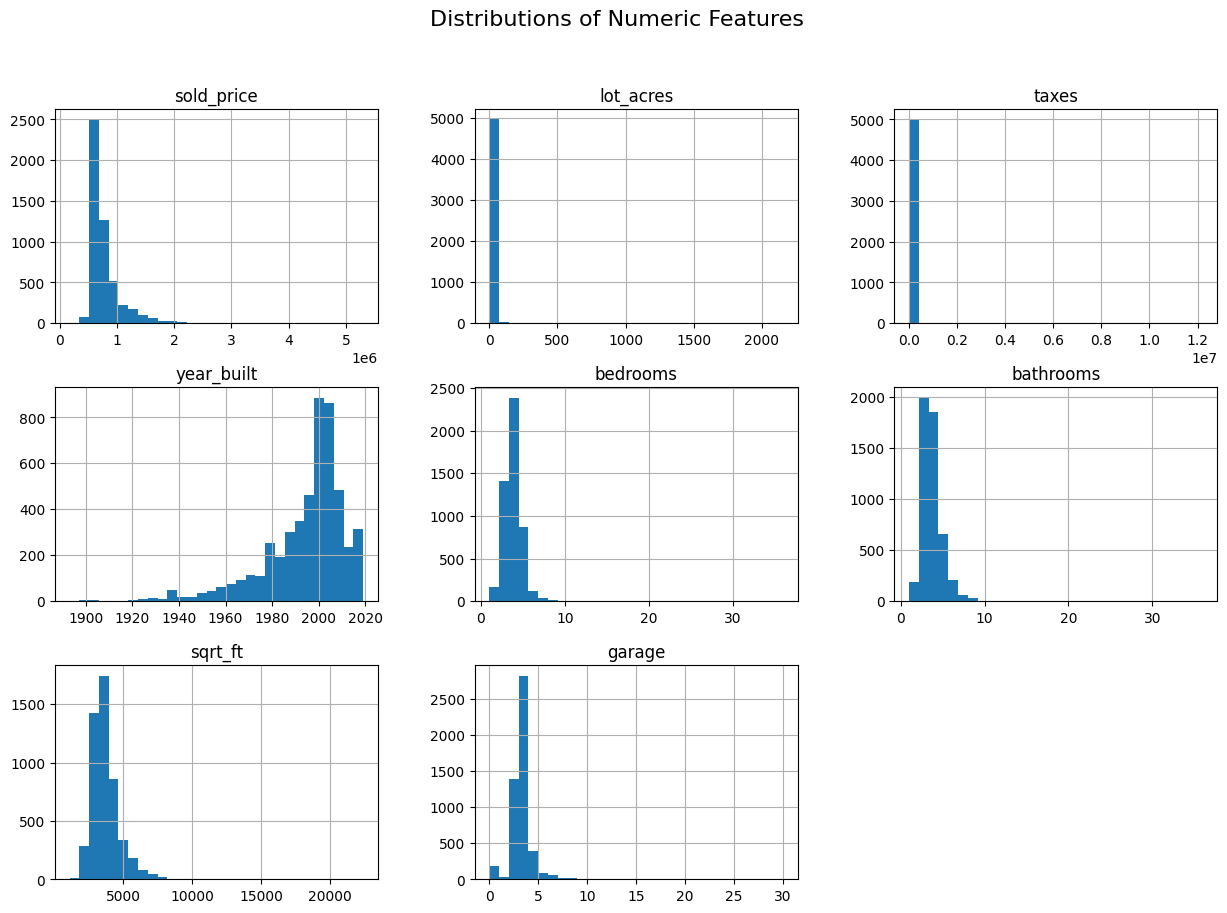

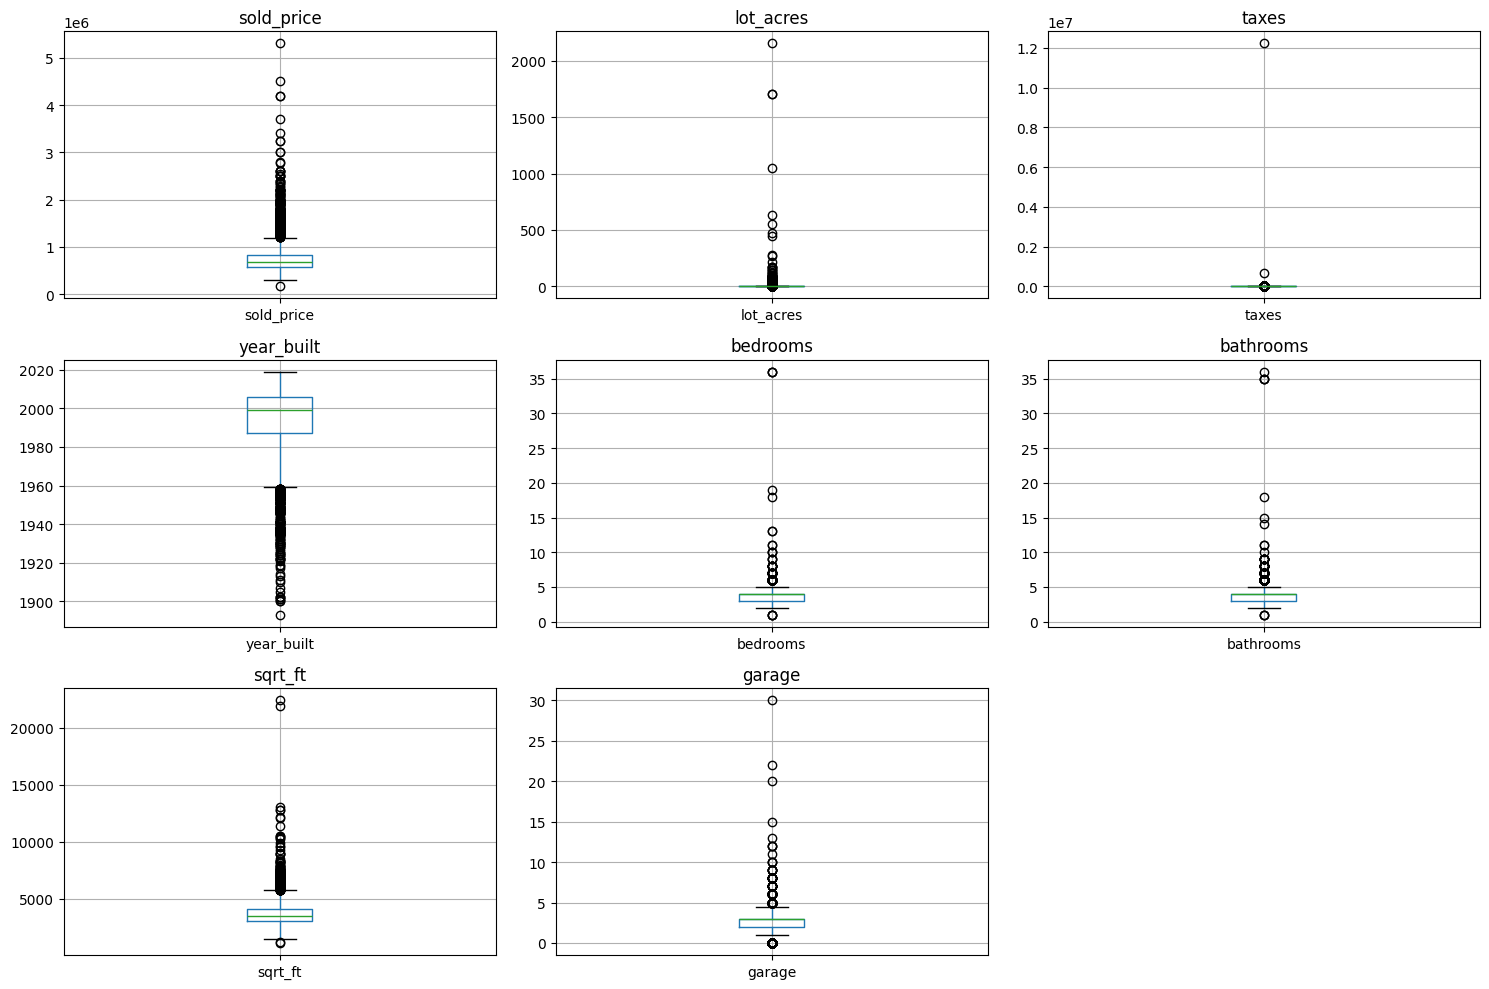

In [54]:
numeric_cols = ['sold_price', 'lot_acres', 'taxes', 'year_built',
                'bedrooms', 'bathrooms', 'sqrt_ft', 'garage']

# Histograms
df[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle('Distributions of Numeric Features', fontsize=16)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    df.boxplot(column=col)
    plt.title(col)
plt.tight_layout()
plt.show()

-Percentile table: It helped us detect skewed distributions and potential outliers in the data.

In [55]:
df[numeric_cols].describe(percentiles=[0.01, 0.05, 0.95, 0.99])

,sold_price,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,774626.20,4.66,9430.30,1994.33,3.93,3.83,3714.08,2.82
std,318555.61,51.63,172937.53,17.73,1.25,1.39,1114.60,1.19
min,169000.00,0.02,1.00,1893.00,1.00,1.00,1100.00,0.00
1%,500000.00,0.14,765.81,1934.00,2.00,2.00,2051.00,0.00
5%,535000.00,0.21,2166.84,1959.00,3.00,3.00,2484.95,2.00
50%,675000.00,0.99,6243.16,1999.00,4.00,4.00,3512.00,3.00
95%,1375000.00,6.31,13230.91,2016.00,5.00,6.00,5660.25,4.00
99%,2000000.00,57.84,20718.27,2018.00,7.00,7.00,7308.07,6.00
max,5300000.00,2154.00,12215075.00,2019.00,36.00,36.00,22408.00,30.00


**Log Transform: Handling Skewed Features**

Some variables like sold_price, lot_acres, and taxes showed noticeable skewness, which led us to apply a log transformation.

In [56]:
# List of skewed numeric columns to transform
skewed_cols = ['sold_price', 'lot_acres', 'taxes', 'sqrt_ft']
non_skewed_cols = [col for col in numeric_cols if col not in skewed_cols]
# Apply log1p transformation (log(1+x)) to handle zeros
for col in skewed_cols:
  df[col + '_log'] = np.log1p(df[col])

log_cols = [col + '_log' for col in skewed_cols]
# Check
df[skewed_cols + log_cols].head()


,sold_price,lot_acres,taxes,sqrt_ft,sold_price_log,lot_acres_log,taxes_log,sqrt_ft_log
0,5300000.00,2154.00,5272.00,10500.00,15.48,7.68,8.57,9.26
1,4200000.00,1707.00,10422.36,7300.00,15.25,7.44,9.25,8.90
2,4200000.00,1707.00,10482.00,3512.00,15.25,7.44,9.26,8.16
3,4500000.00,636.67,8418.58,9019.00,15.32,6.46,9.04,9.11
4,3411450.00,3.21,15393.00,6396.00,15.04,1.44,9.64,8.76


**Visualize Log-transformed Columns**

After applying the log transformation, I plotted histograms and boxplots again to check the distribution.
This helped to see if the data became more normally distributed.
The results showed that the transformation made the data more balanced and reduced the effect of extreme outliers.
This is important because many models, especially regression-based ones, perform better when the input features are closer to a normal distribution.

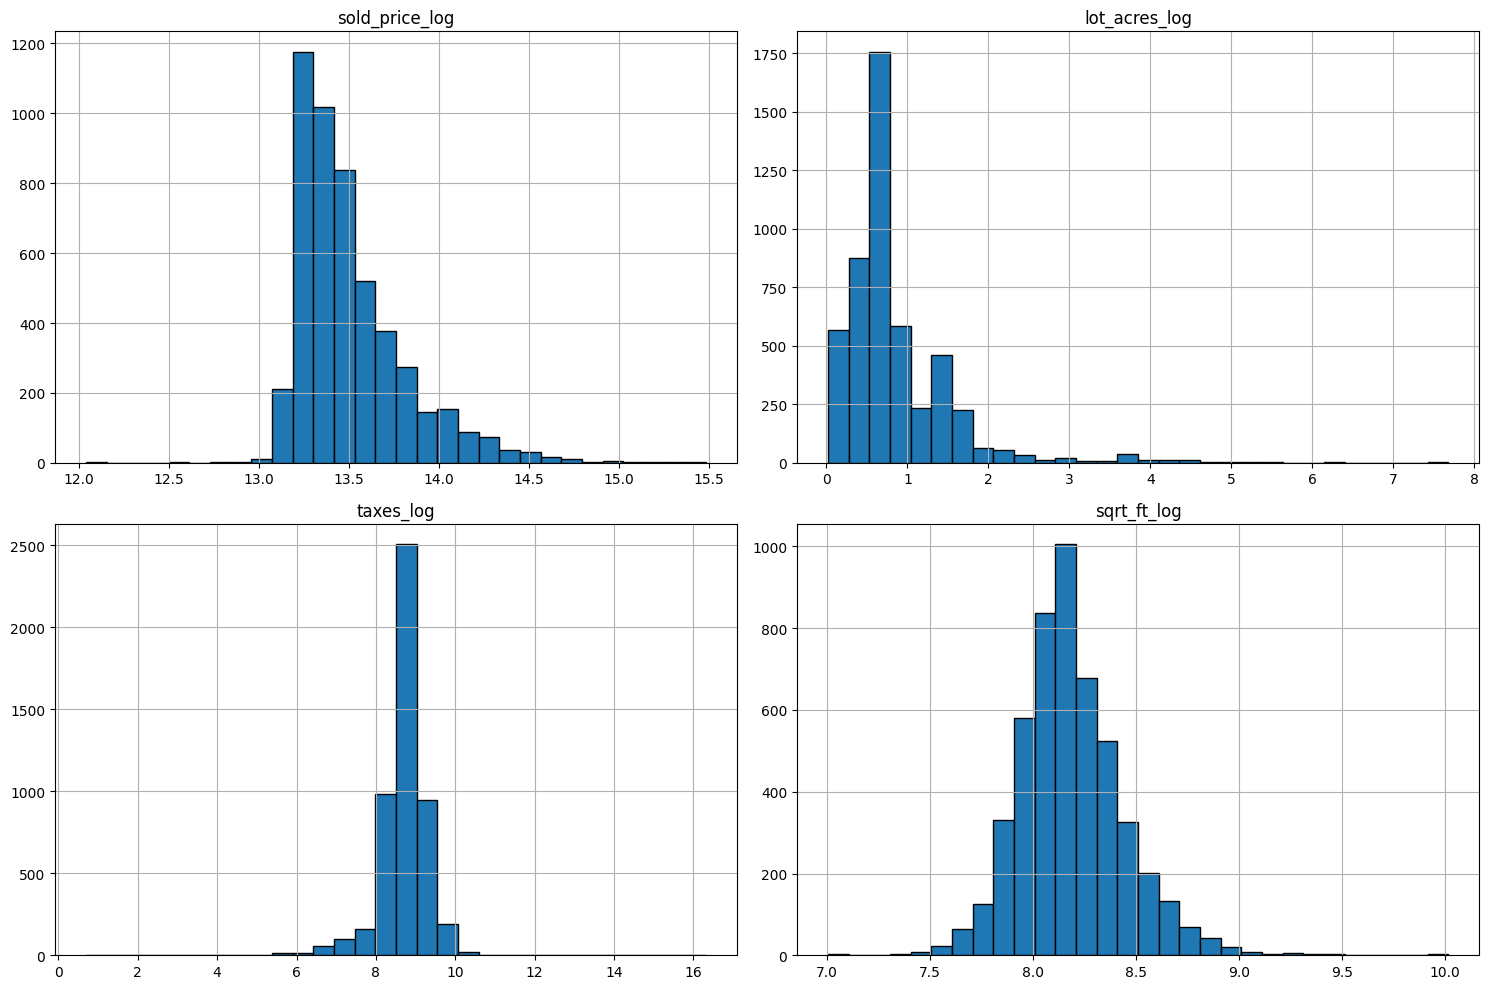

In [57]:
# Histograms
plt.figure(figsize=(15,10))
for i, col in enumerate(log_cols):
  plt.subplot(2,2,i+1)
  df[col].hist(bins=30, edgecolor='black')
  plt.title(col)
plt.tight_layout()
plt.show()

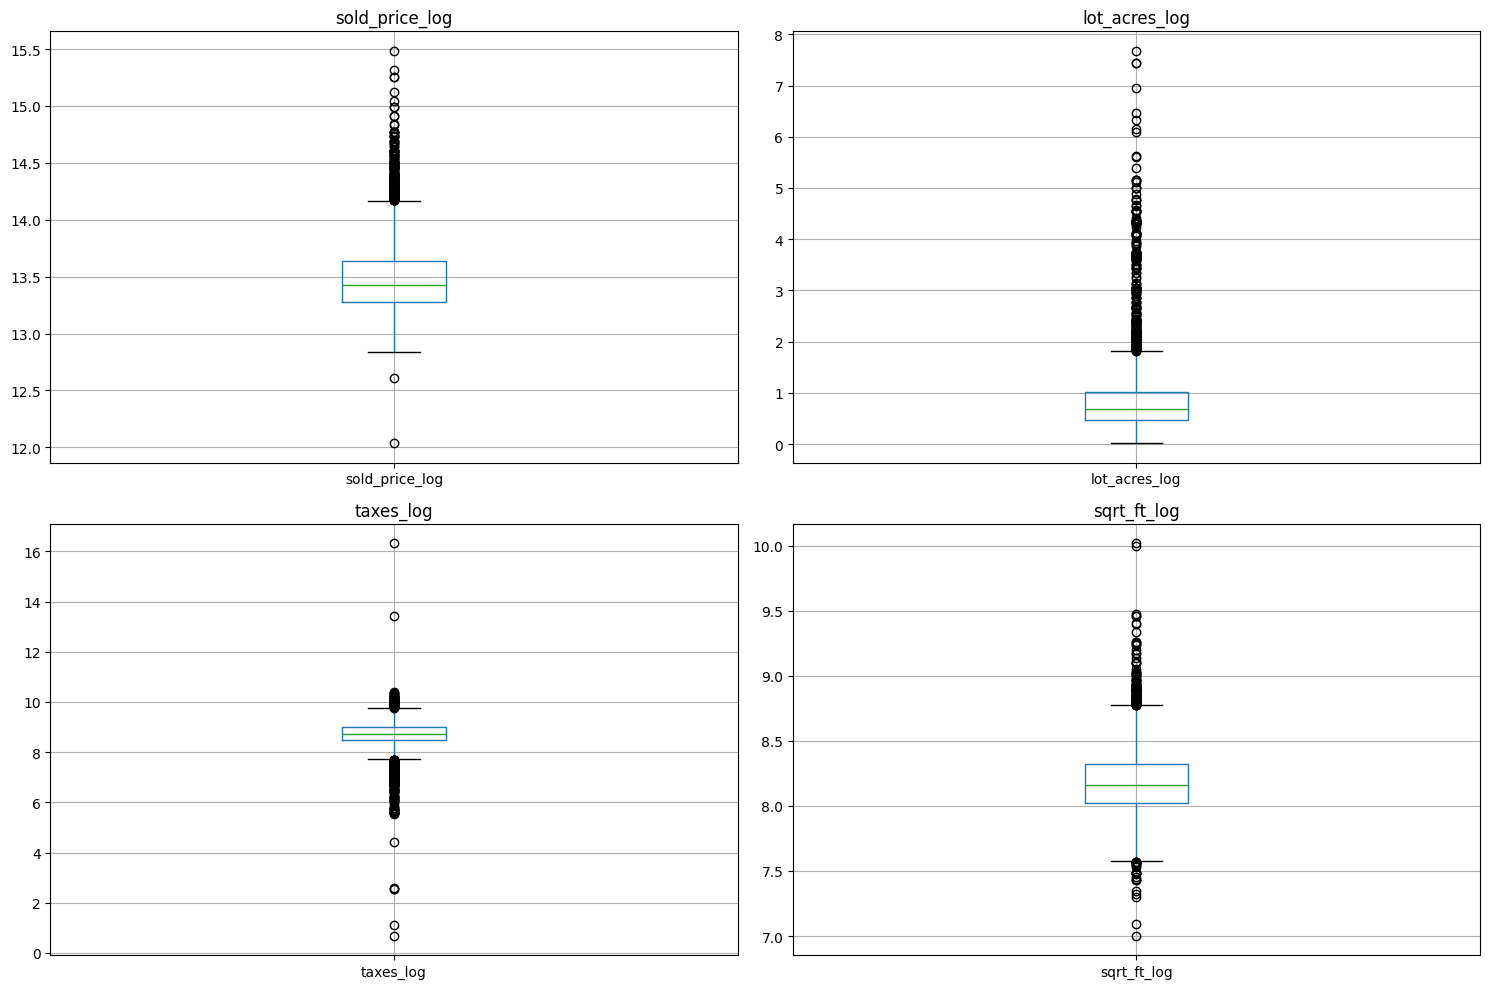

In [58]:
# Check boxplots for outliers after log
plt.figure(figsize=(15,10))
for i, col in enumerate(log_cols):
    plt.subplot(2, 2, i +1)
    df.boxplot(column=col)
    plt.title(col)
plt.tight_layout()
plt.show()

We created a correlation heatmap to see how numeric features relate to sold_price.

• Strong positive correlation with price: sqrt_ft_log (0.57), taxes_log (0.38), bathrooms (0.35)

 • Weak/moderate correlation with price: bedrooms, garage, lot_acres_log, year_built

 • Potential multicollinearity: bedrooms & bathrooms (0.69)

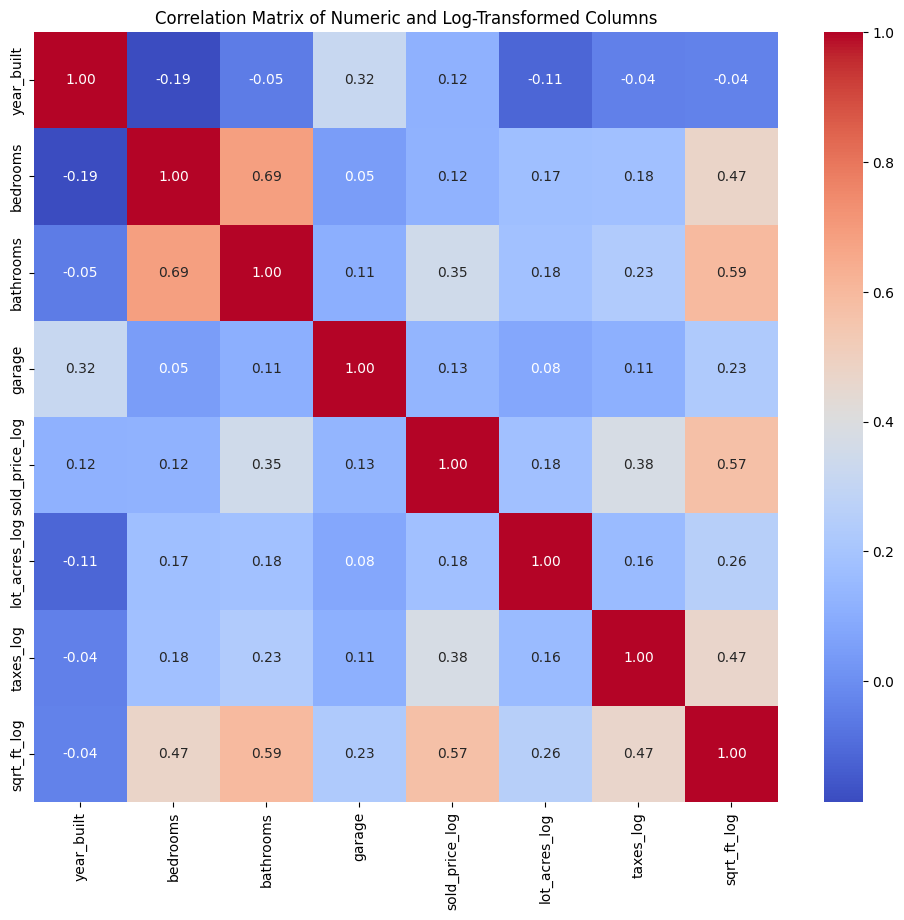

In [59]:
# Keep log_transformed skewed columns and non-skewed numeric columns
corr_cols = non_skewed_cols + [col + '_log' for col in skewed_cols]

# Compute correlation matrix
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numeric and Log-Transformed Columns")
plt.show()

In [60]:
# Show correlation matrix as a table
corr_table = df[corr_cols].corr()
corr_table

,year_built,bedrooms,bathrooms,garage,sold_price_log,lot_acres_log,taxes_log,sqrt_ft_log
year_built,1.00,-0.19,-0.05,0.32,0.12,-0.11,-0.04,-0.04
bedrooms,-0.19,1.00,0.69,0.05,0.12,0.17,0.18,0.47
bathrooms,-0.05,0.69,1.00,0.11,0.35,0.18,0.23,0.59
garage,0.32,0.05,0.11,1.00,0.13,0.08,0.11,0.23
sold_price_log,0.12,0.12,0.35,0.13,1.00,0.18,0.38,0.57
lot_acres_log,-0.11,0.17,0.18,0.08,0.18,1.00,0.16,0.26
taxes_log,-0.04,0.18,0.23,0.11,0.38,0.16,1.00,0.47
sqrt_ft_log,-0.04,0.47,0.59,0.23,0.57,0.26,0.47,1.00


**Categorical Features Analysis**

Check the most frequent values in categorical columns.
This helps identify the common categories, simplify analysis, and understand which features might have the most impact on the target.

In [61]:
# List of categorical columns
cat_cals = ['kitchen_features', 'fireplaces', 'floor_covering']

# Check number of frequent values
for col in cat_cals:
  most_common = df[col].mode()[0]
  count = df[col].value_counts()[most_common]
  print(f"Column: {col}")
  print(f"Most frequent values: {most_common}({count} times)")
  print("-"*40)


Column: kitchen_features
Most frequent values: Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven(1719 times)
----------------------------------------
Column: fireplaces
Most frequent values: 1(1806 times)
----------------------------------------
Column: floor_covering
Most frequent values: Carpet, Ceramic Tile(1236 times)
----------------------------------------


In [63]:
# Skewed columns that were log-transformed
skewed_cols = ['sold_price', 'lot_acres', 'taxes', 'sqrt_ft']

# Corresponding log-transformed columns
log_cols = [col + '_log' for col in skewed_cols]

# Non-skewed numeric columns
numeric_cols = ['year_built', 'bedrooms', 'bathrooms', 'garage']
non_skewed_cols = [col for col in numeric_cols if col not in skewed_cols]

# Identification and categorical columns to keep
id_cols = ['MLS', 'zipcode', 'longitude', 'latitude']
categorical_cols = ['kitchen_features', 'fireplaces', 'floor_covering']

# Final columns for the clean dataset
final_cols = id_cols + non_skewed_cols + log_cols + categorical_cols

# Create clean dataframe
df_clean = df[final_cols].copy()

# Quick check
print("Columns in clean dataset:", df_clean.columns)
print("Shape:", df_clean.shape)
df_clean.head()

# Save to CSV
df_clean.to_csv('cleaned_houses_dataset.csv', index=False)

Columns in clean dataset: Index(['MLS', 'zipcode', 'longitude', 'latitude', 'year_built', 'bedrooms',
       'bathrooms', 'garage', 'sold_price_log', 'lot_acres_log', 'taxes_log',
       'sqrt_ft_log', 'kitchen_features', 'fireplaces', 'floor_covering'],
      dtype='object')
Shape: (5000, 15)


**EDA & Cleaning Summary**

 • **Data**: 5,000 rows, 16 columns; target = sold_price.

 • **Missing Values**: Filled numeric with median, categorical with mode; dropped HOA.

 • **Visualization**: Histograms and boxplots checked; log-transform applied to skewed features.

 • **Correlation**: Strong links with sold_price_log: sqrt_ft_log, taxes_log, bathrooms; multicollinearity between bedrooms & bathrooms.

 • **Categorical**: Frequent values summarized; modeling team will decide how to use them.